### EX. NO. 1D FEATURE EXTRACTION / FEATURE SELECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetesData = pd.read_csv('diabetes.csv')
diabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Q1) Perform feature selection using Pearson correlation coefficient.

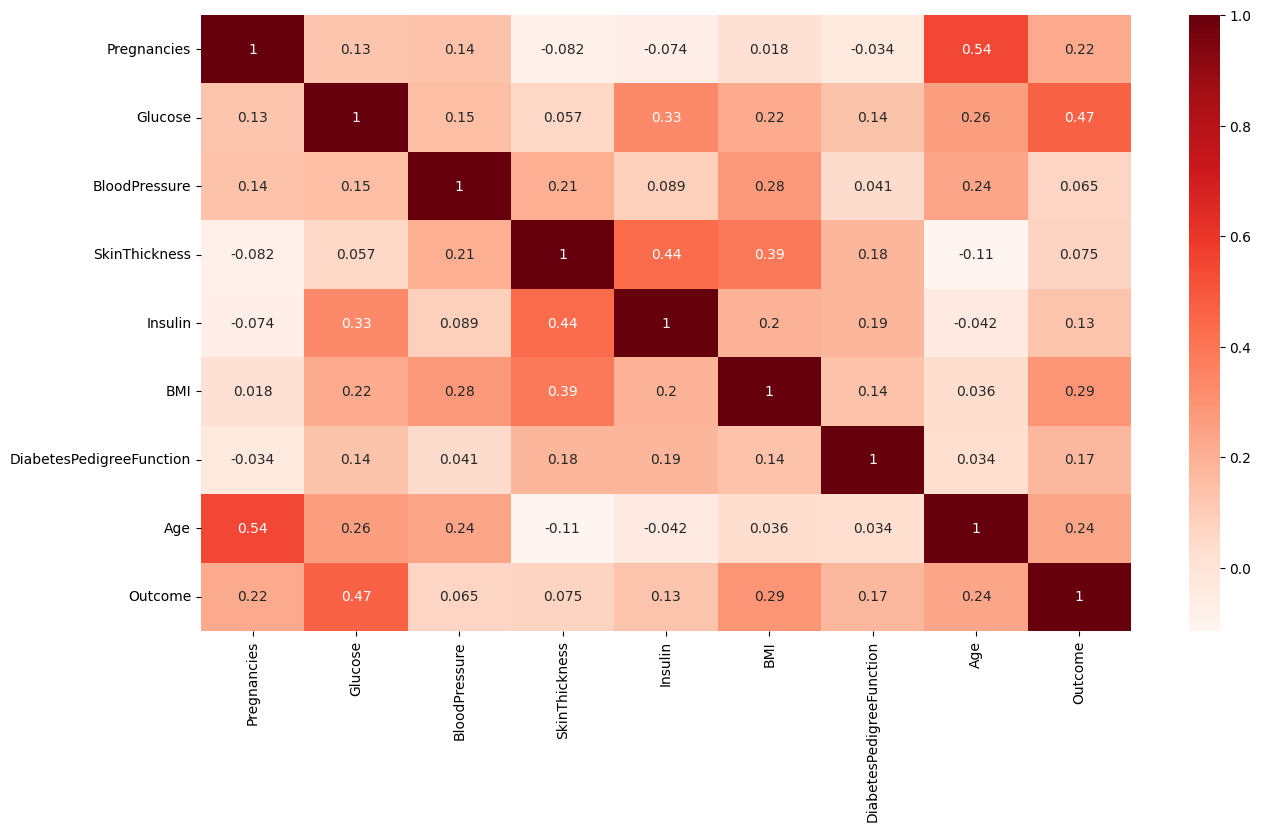

In [ ]:
plt.figure(figsize=(15,8))
corr = diabetesData.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
cor_target = abs(corr["Outcome"])

In [ ]:
cor_target

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
relevant_features = cor_target[cor_target > 0.20]
relevant_features

Pregnancies    0.221898
Glucose        0.466581
BMI            0.292695
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64

In [ ]:
diabetesData[["Pregnancies", "Glucose"]].corr()

,Pregnancies,Glucose
Pregnancies,1.000000,0.129459
Glucose,0.129459,1.000000


In [ ]:
diabetesData[["Pregnancies", "Age"]].corr()
# Delete Age/ Pregnancy as they are correlated

,Pregnancies,Age
Pregnancies,1.000000,0.544341
Age,0.544341,1.000000


In [ ]:
diabetesData[["Pregnancies", "BMI"]].corr()
# Can Delete both

,Pregnancies,BMI
Pregnancies,1.000000,0.017683
BMI,0.017683,1.000000


In [ ]:
diabetesData[["Age", "Glucose"]].corr()
# Can delete both(Keep Glucose as its relation with outcome is high)

,Age,Glucose
Age,1.000000,0.263514
Glucose,0.263514,1.000000


In [ ]:
diabetesData[["BMI", "Glucose"]].corr()
# Can delete Both

,BMI,Glucose
BMI,1.000000,0.221071
Glucose,0.221071,1.000000


In [ ]:
diabetesData[["BMI", "Age"]].corr()
# Can delete both as cor < 0.5

,BMI,Age
BMI,1.000000,0.036242
Age,0.036242,1.000000


Final Features :
Age and Glucose as they are highly correlated with Outcome.

Q2) Perform feature selection using recursive feature elimination method.

In [ ]:
#import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetesData.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
diabetesData.shape

(768, 9)

In [ ]:
X = diabetesData.values[:, 0:8]
Y = diabetesData.values[:, 8]
X.shape, Y.shape

((768, 8), (768,))

In [ ]:
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression()

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=3)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [ ]:
fit = rfe.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
fit.n_features_

3

In [ ]:
fit.support_

array([ True, False, False, False, False,  True,  True, False])

In [ ]:
fit.classes_

array([0., 1.])

In [ ]:
fit.ranking_

array([1, 2, 4, 5, 6, 1, 1, 3])

In [ ]:
cols = list(diabetesData.columns)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
print("Columns that can be chosen according to RFE : ", end = " ")
fitcolumns = list(fit.support_)
for i in range(len(fitcolumns)):
  if fitcolumns[i] :
    print(cols[i], end = " ")

Columns that can be chosen according to RFE :  Pregnancies BMI DiabetesPedigreeFunction 

Final Features :
Pregnancies, BMI and DiabetesPedigreeFunction
-> according to RFE

3. Select K best features using statistical methods.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = diabetesData.iloc[:, :-1]
Y = diabetesData.iloc[:, -1]

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print("Features acc to f_classif : ", selected_features) # According Select K Best Features using f_classif


selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print("Features acc to chi2 : ", selected_features) # According Select K Best Features using chi2

Features acc to f_classif :  ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Features acc to chi2 :  ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


4. Find the optimum number of features from a dataset (Use recursive feature
elimination)

In [1]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
num_features_range = range(1, len(X.columns)+1)
scores = []

for num_features in num_features_range :
  rfe = RFE(estimator=classifier, n_features_to_select=num_features)
  cv_scores = cross_val_score(rfe, X, Y, cv=5)
  scores.append(cv_scores.mean())

optimal_num_features = num_features_range[scores.index(max(scores))]
print("Optimal Number of Features using RFE and cross_val :", optimal_num_features)

NameError: ignored



```
`# This is formatted as code`
```

5. Use Principal Component Analysis for better data visualization. Also analyze the
variance of the dimensions (Use Iris dataset )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Target, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Target, Length: 150, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: Target, Length: 150, dtype: bool


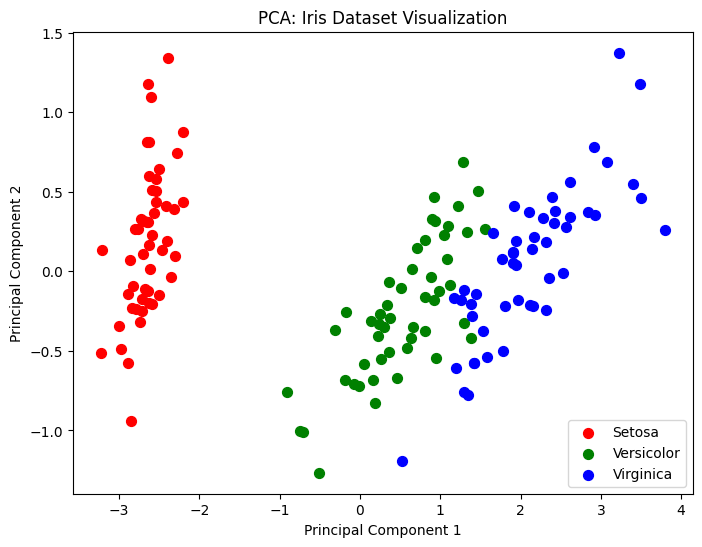

Explained Variance Ratio: [0.92461872 0.05306648]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y
print(y)
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for target, color, label in zip(targets, colors, labels):
    indices = df_pca['Target'] == target
    print(indices)
    plt.scatter(df_pca.loc[indices, 'Principal Component 1'], df_pca.loc[indices, 'Principal Component 2'],
                c=color, s=50, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset Visualization')
plt.legend()
plt.show()

# Analyze the variance of the dimensions
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
